#Dia 3 - 7 Days Of Code Alura | Machine Learning

Primeiro passo - Dividindo o dataset(treino, validação e teste)

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# outras
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# mesagens de warning
warnings.filterwarnings("ignore")

#Importando DataFrame
spotify_df = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv', index_col=0)
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [52]:
#Verificando os dados (quantidade de linhas, colunas e tipo de cada coluna)

spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [53]:
#Buscando a descrição dos atributos numéricos

spotify_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Segundo Passo - Realizando análise exploratória dos dados, verificando principais características

In [54]:
#Visualizando dimensões do DF

spotify_df.shape

(114000, 20)

In [55]:
#Visualizando nome das colunas do DF

spotify_df.columns


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [56]:
#Visualizando maiores durações e menores durações de músicas

spotify_df.duration_ms

0         230666
1         149610
2         210826
3         201933
4         198853
           ...  
113995    384999
113996    385000
113997    271466
113998    283893
113999    241826
Name: duration_ms, Length: 114000, dtype: int64

In [57]:
#Validando quantidade única de Artista e Músicas x Artista

print(spotify_df['artists'].unique().shape)
print("-"*500)
print(spotify_df['artists'].value_counts())

(31438,)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Au

Verificando valores em branco(ausentes)

In [58]:
#Ordenando em ordem decrescente por valor ausente

(spotify_df.isnull().sum() / spotify_df.shape[0]).sort_values(ascending=False)


album_name          0.000009
track_name          0.000009
artists             0.000009
track_id            0.000000
speechiness         0.000000
time_signature      0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
loudness            0.000000
mode                0.000000
key                 0.000000
energy              0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
track_genre         0.000000
dtype: float64

In [59]:
#Verificando quantidade de valores ausentes

spotify_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

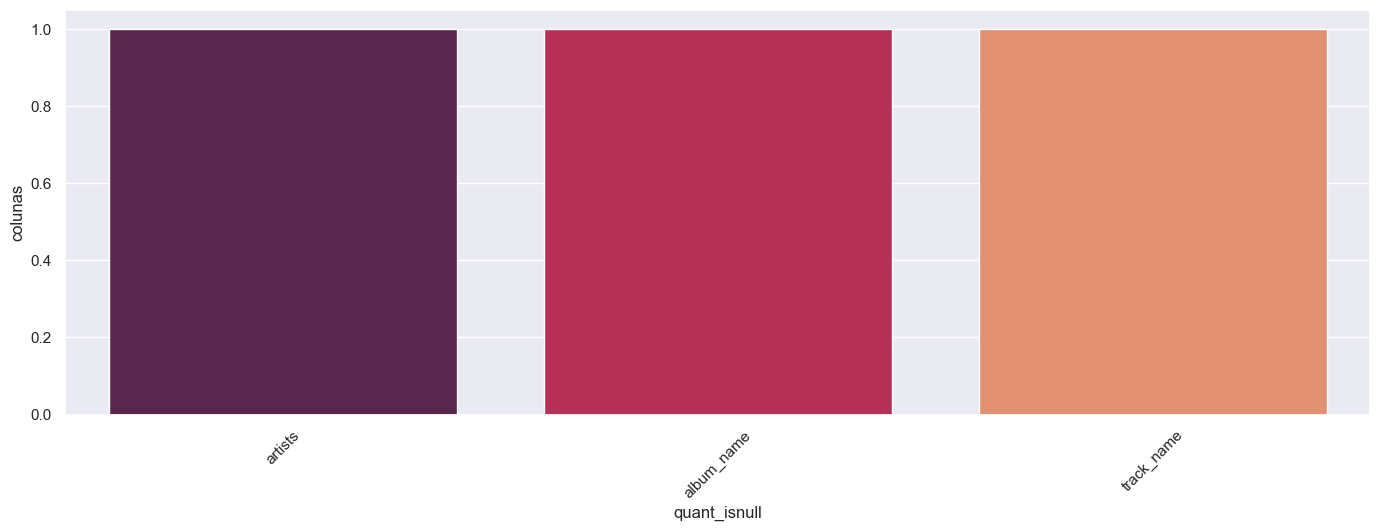

In [60]:
#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"colunas":[],"quant_isnull":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["quant_isnull"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45);
  
missing_visualization(spotify_df)

Quais são as 100 músicas mais populares?

In [61]:
sorted_df = spotify_df.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


Quais os artistas mais populares?

In [62]:
artistas_popularidade = spotify_df[['artists', 'popularity']]
artistas_populares = artistas_popularidade.groupby("artists").mean().sort_values(by='popularity', ascending=False).reset_index()

#Trazendo somente os 5 primeiros
artistas_populares = artistas_populares.head()
artistas_populares


,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,94.5


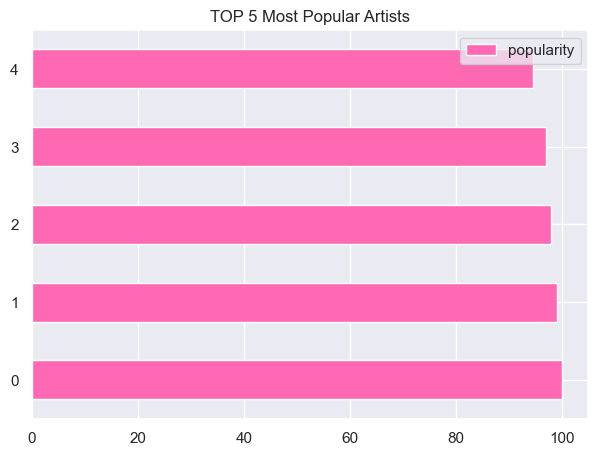

In [63]:
#Análise visual de popularidade dos artistas

artistas_populares.plot.barh(color="hotpink") ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

Dentre os gêneros musicais, quais são os mais populares?

In [64]:
trend_genre = spotify_df[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


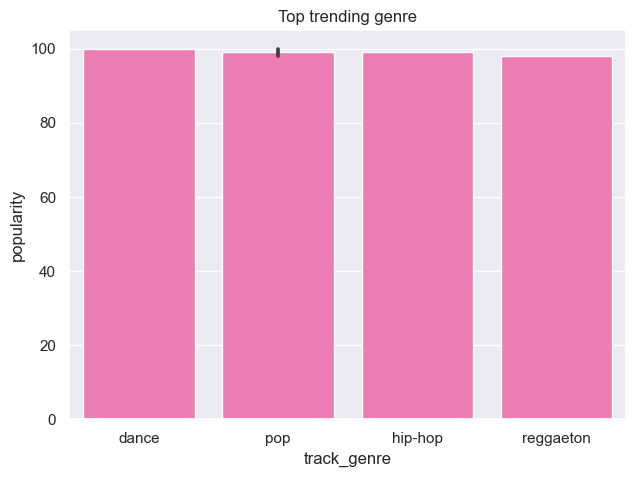

In [65]:
#Análise visual dentre os gêneros mais populares

sns.barplot(x="track_genre",y="popularity", data=trend_genre, color = 'hotpink')
plt.title("Top trending genre")
plt.show()

Analisando as músicas mais longas

In [66]:
long_songs = spotify_df[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10984,Crossing Wires 002 - Continuous DJ Mix,4789026
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897


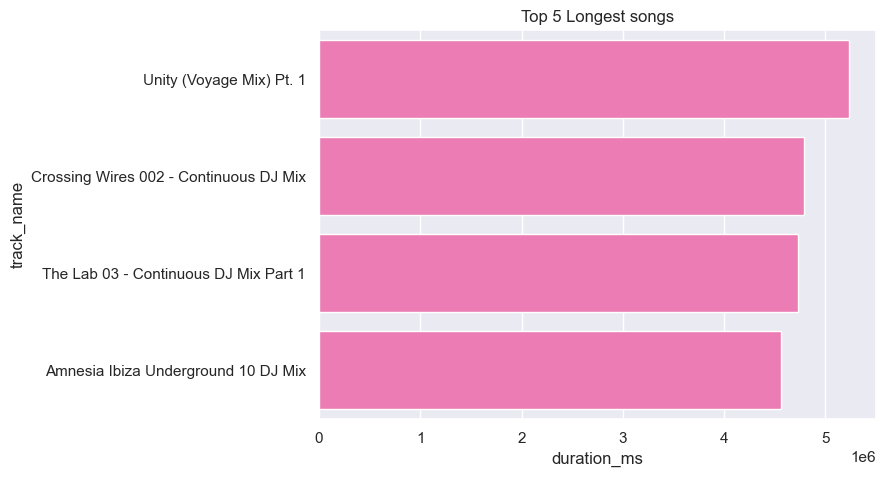

In [67]:
#Análise visual das músicas mais longas comparando sua dimensão em milissegundos

sns.barplot(x="duration_ms", y="track_name", data= long_songs, color = 'hotpink')
plt.title("Top 5 Longest songs")
plt.show()

Analisando as músicas mais "dançáveis" de acordo com o DF

In [68]:
danceable = spotify_df[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable 

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


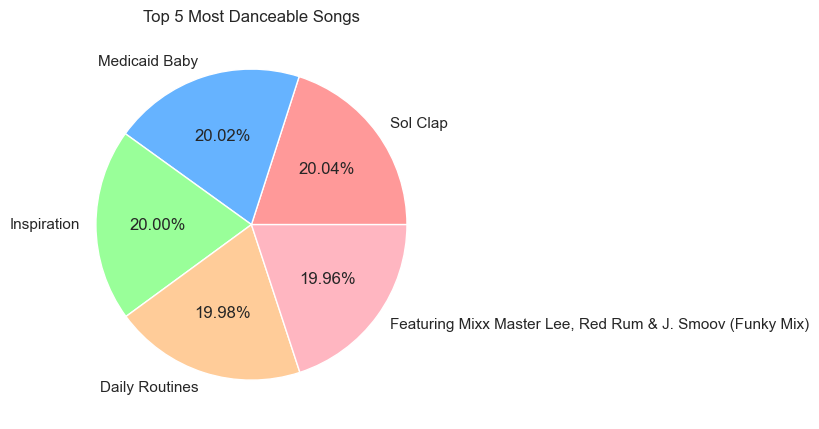

In [69]:
#Análise visual das músicas por danceability

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb6c1']

plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name, colors = colors)
plt.title("Top 5 Most Danceable Songs")
plt.show()

Verificando correlação entre as variáveis

Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Ao examinar a correlação, podemos determinar se as variáveis estão positivamente correlacionadas (ou seja, quando uma aumenta, a outra também aumenta), negativamente correlacionadas (quando uma aumenta, a outra diminui) ou não correlacionadas (quando não há relação aparente entre as variáveis).

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

In [70]:
spotify_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [71]:
corr_table = spotify_df.select_dtypes(include=[np.number]).corr(method="pearson")

In [72]:
corr_table

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138
instrumentalness,-0.095139,0.124371,-0.185606,-0.181879,-0.006823,-0.433477,-0.049955,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.082580


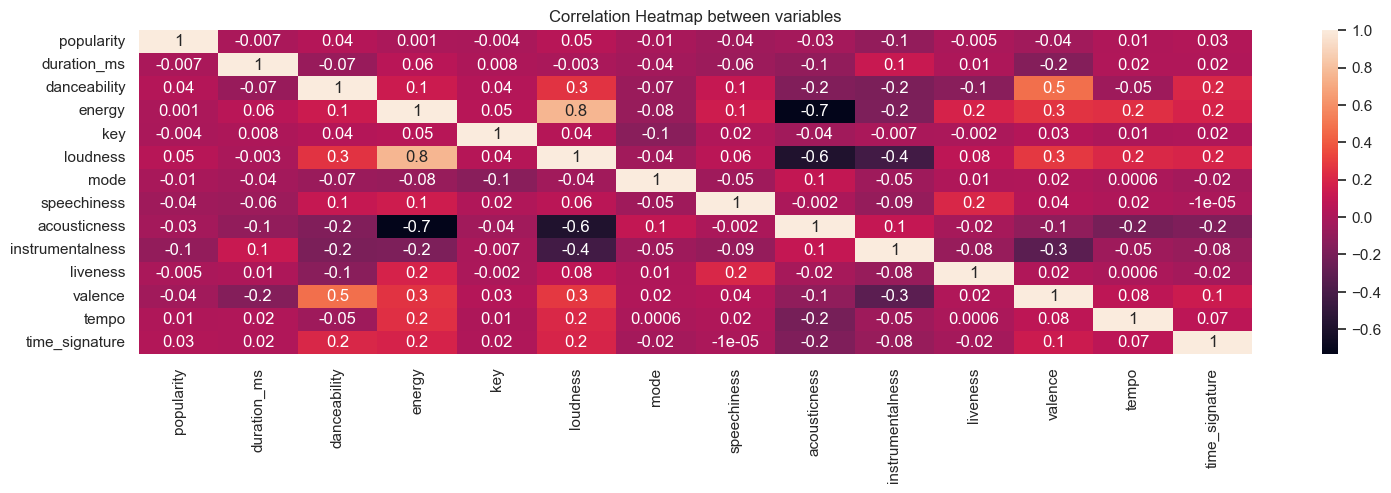

In [73]:
#Análise Visual da correlação

#Plotando a tabela de correlação usando o Seaborn.
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #mostrando o plot

Nota-se loudness e energia com uma alta correlação.

Dando sequência aos passos do segundo dia

Esse é o momento em que começamos a prepoarar nosso conjunto de dados para nosso modelo de machine learning!

In [74]:
#Removendo itens duplicados

spotify_df = spotify_df.drop_duplicates()
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Trecho da proposta do dia:
Outro ponto importante: você deve ter percebido na etapa anterior, de análise dos dados, que a coluna de popularidade apresenta números que variam de 0 a 100. E de acordo com a documentação da API do Spotify, 100 representa a mais popular. Esse número é baseado no número total de reproduções que a faixa teve e quão recentes são as reproduções.

Como você quer saber se uma música será popular ou não, você precisará estabelecer um corte de popularidade. Por exemplo, você pode definir que todas as músicas com popularidade acima de 70 são consideradas populares e aquelas abaixo de 70 são consideradas não populares. Esse corte não é padrão e pode ser ajustado para testar diferentes cenários.

Portanto, para prosseguir com o modelo de classificação, você precisa converter a coluna de popularidade em uma classe binária (1 para popular, 0 para não popular).

Próxima etapa consiste emm criar classes de popularidades com essas informações

In [75]:
# Criando classes de popularidade
spotify_df[spotify_df["popularity"] >=80]

conditionlist = [
    (spotify_df['popularity'] >= 80) ,
    (spotify_df['popularity'] <80)]

choicelist = [1,0]
spotify_df['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
spotify_df['pop_classe'] = spotify_df['pop_classe'].astype(int)

In [76]:
spotify_df = spotify_df.dropna() #removendo valores nulos
spotify_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'pop_classe'],
      dtype='object')

In [77]:
spotify_df = spotify_df.drop(columns=['popularity'])
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   duration_ms       113549 non-null  int64  
 5   explicit          113549 non-null  bool   
 6   danceability      113549 non-null  float64
 7   energy            113549 non-null  float64
 8   key               113549 non-null  int64  
 9   loudness          113549 non-null  float64
 10  mode              113549 non-null  int64  
 11  speechiness       113549 non-null  float64
 12  acousticness      113549 non-null  float64
 13  instrumentalness  113549 non-null  float64
 14  liveness          113549 non-null  float64
 15  valence           113549 non-null  float64
 16  tempo             113549 

Fazendo a limpeza dos dados, mantendo somente colunas quantitativas e relevantes para o modelo

In [78]:
#Mantendo somente colunas quantitativas e que são importantes para o modelo

df_quantitative = spotify_df
cols_to_drop = []
for column in spotify_df:
    if spotify_df[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = spotify_df.drop(columns=cols_to_drop)

print(f"Tamanho da base de dados: {df_quantitative.shape}")

Tamanho da base de dados: (113549, 15)


In [79]:
df_quantitative.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [80]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113549 non-null  int64  
 1   danceability      113549 non-null  float64
 2   energy            113549 non-null  float64
 3   key               113549 non-null  int64  
 4   loudness          113549 non-null  float64
 5   mode              113549 non-null  int64  
 6   speechiness       113549 non-null  float64
 7   acousticness      113549 non-null  float64
 8   instrumentalness  113549 non-null  float64
 9   liveness          113549 non-null  float64
 10  valence           113549 non-null  float64
 11  tempo             113549 non-null  float64
 12  time_signature    113549 non-null  int64  
 13  pop_classe        113549 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 12.6 MB


In [81]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())
df_quantitative_nm.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


Dando sequência com desafios do #Dia 3

# ➗ Dividindo o dataset (treino, validação e teste)

Para divisão do dataset, separou-se em treino e teste, sendo que o teste será dividido com 20% de todo o conjunto e será usado somente após o modelo ser escolhido e ajustado.

Já os dados de treino, serão separados em treino e validação. Sendo os dados de validação usados para comparação de diferentes modelos e hiperparâmetros.

Embora os modelos sejam testados e otimizados, é díficil prever se perfomará bem em produção, por isso, o acompanhamento inicial é importante para verificar se realmente funciona ou precisa de ajustes.

**Dados de treinamento:** usado para treinar o modelo.

**Dados de validação:** usado para comparação de diferentes modelos e hiperparâmetros.

Dados de teste: usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

In [82]:
#Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

In [83]:
#Visualizando as proporções da variável alvo
df_train.pop_classe.value_counts(normalize=True)

pop_classe
0.0    0.98941
1.0    0.01059
Name: proportion, dtype: float64

In [84]:
#Visualizando as proporções da variável alvo
df_test.pop_classe.value_counts(normalize=True)

pop_classe
0.0    0.989564
1.0    0.010436
Name: proportion, dtype: float64

In [85]:
#Dividindo X e Y (X para obter Y)
X = df_train.drop('pop_classe', axis=1)
y = df_train.pop_classe

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
#Laço para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [87]:
#Verificando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.pop_classe==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((72672, 13), (18167, 13), (72672,), (18167,))

Proporção do df_train para classe=1: 0.0106

Proporção de X_train para classe=1:  0.0106
Proporção de X_val para classe=1:    0.0106


Agora que os dois conjuntos estão com a mesma proporção na variável resposta, vamos trabalhar somente com o conjunto de dados de treio e o teste somente para validação final.

Definindo o baseline

 *Uma linha de base (baseline) é o resultado de um modelo/solução muito básico. Você geralmente cria uma linha de base e depois tenta fazer soluções mais complexas para obter um resultado melhor. Se você conseguir uma pontuação melhor do que a linha de base, é bom.*

Começamos dividindo os dados em treino e validação (X - variáveis preditoras, y - variável de objetivo) e após utilizei o `StratifiedKFold` que separa os dados para uma validação cruzada preservando o percentual de amostras em cada classe.

In [88]:
# Instanciando o modelo
logReg = LogisticRegression()

# Treinando o modelo
logReg.fit(X_train, y_train)

# Prevendo nos dados de treino
y_pred_base_train = logReg.predict(X_train)

# Prevendo nos dados de validação
y_pred_base_val = logReg.predict(X_val)

In [89]:
logReg.coef_.tolist()[0]

[-1.1656257012068987,
 2.1778538476604448,
 -1.45093716692689,
 0.031785218960955805,
 4.669393484713582,
 -0.07821555869810537,
 -0.38956591638709104,
 -1.7649310946970656,
 -2.6650941554689114,
 -1.5591831614718448,
 -0.43473944015695026,
 -0.7057343475089161,
 -1.005837760678652]

In [90]:
df_coef = df_quantitative_nm.drop(columns='pop_classe')
df_coef.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [91]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

,Features,Coef
0,duration_ms,-1.165626
1,danceability,2.177854
2,energy,-1.450937
3,key,0.031785
4,loudness,4.669393
5,mode,-0.078216
6,speechiness,-0.389566
7,acousticness,-1.764931
8,instrumentalness,-2.665094
9,liveness,-1.559183


Validando o baseline:

In [92]:
print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894044473800088
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894313865800628
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


Dia 6 - Reamostragem, teste e validação.

In [93]:
# Dicionário dos classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

## Distribuição (Random UnderSampling)

Para esta subamostragem vamos utilizar um dos métodos da família Near-miss, da biblioteca imblearn que consiste selecionar amostras baseados na distância da classe majoritária com as amostras da classe minoritária, basicamente utilizando o modelo de KNN em seu framework.

Há 3 versões desse método: NearMiss1, NearMiss2 e NearMiss3. Para este teste será utilizada a versão 1, que é padrão quando não passamos nenhum parâmetro.

In [94]:
# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)

Counter({0.0: 770, 1.0: 770})


In [95]:
for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.2174822480321462
precision: 0.008343850792315243
recall:    0.6197916666666666
f1:        0.016466030164660302
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.17735454395332195
precision: 0.009443373013234023
recall:    0.7395833333333334
f1:        0.018648630901569374
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.15869433588374526
precision: 0.0111427831044312
recall:    0.8958333333333334
f1:        0.022011773739442027
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.03511862167666648
precision: 0.010447845484836505
recall:    0.9635416666666666
f1:        0.020671545896418793
-----------------------

## Distribuição (Random Over-Sampling)

Este método consiste em adicionar um conjunto aleatório de cópias de amostras da classe minoritária aos dados, podendo aumentar a probabilidade de sobreajuste, porém, isso também pode resultar em um aumento no custo computacional ao ajustar o modelo, especialmente por considerar que o modelo estará vendo as mesmas amostras no conjunto de treinamento novamente.

In [96]:
# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [97]:
for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.6135300269719821
precision: 0.019558182074011537
recall:    0.7239583333333334
f1:        0.03808740923414166
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9794132217757472
precision: 0.2780487804878049
recall:    0.59375
f1:        0.3787375415282392
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.984422304177905
precision: 0.36253776435045315
recall:    0.625
f1:        0.45889101338432126
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.988220399625695
precision: 0.4576923076923077
recall:    0.6197916666666666
f1:        0.5265486725663716
------------------------------------------------------------


## SMOTE (Over-Sampling)

O SMOTE Syntetic Minority Oversampling Technique consiste em selecionar uma amostra aleatório da classe minoritária escolhido primeiro, então, k vizinhos mais próximos dessa amostra, dai um vizinho também é selecionado aleatoriamente e uma amostra sintética é criado nesse espaço entre essas duas.

In [98]:
# instanciando o método
oversample_smote = SMOTE(sampling_strategy='minority')

# transformando o conjunto de dados
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_smote)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [99]:
for nome, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.6324654593493697
precision: 0.020694752402069475
recall:    0.7291666666666666
f1:        0.04024723300273106
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9442946000990807
precision: 0.11247637051039698
recall:    0.6197916666666666
f1:        0.1904
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9640557053999009
precision: 0.15952732644017725
recall:    0.5625
f1:        0.2485615650172612
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.988220399625695
precision: 0.45528455284552843
recall:    0.5833333333333334
f1:        0.5114155251141552
-----------------------------------------------------------

## Híbrido: Oversampling e Undersampling

Agora, combinando a técnica de sobreamostragem ao conjunto de dados e, em seguida, aplica a subamostragem à saída da transformação da sobreamostragem, antes de retornar o resultado final.

In [100]:
# transformando o conjunto de dados
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# instanciando um pipeline com os dois métodos
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transformando o conjunto de dados
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under_over)
print(counter)

Counter({0.0: 14380, 1.0: 7190})


In [101]:
for nome, model in classifiers.items():
    
    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.8691033192051522
precision: 0.026429809358752165
recall:    0.3177083333333333
f1:        0.0488
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9144602851323829
precision: 0.08066502463054187
recall:    0.6822916666666666
f1:        0.14427312775330395
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9578356360433754
precision: 0.15169902912621358
recall:    0.6510416666666666
f1:        0.24606299212598423
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9873396818407002
precision: 0.4316546762589928
recall:    0.625
f1:        0.5106382978723404
-----------------------------------------------------------

# 💥 Avaliação dos modelos

Após testar vários modelos, selecionei o que performou um pouco melhorno geral, **Random Forest**. O método de balanceamento escolhido foi o **Random Over-Sampling**

## Ajustando (tunning) o modelo selecionado

Vamos definir os hiperparâmetros para analisar a melhor performance com a validação cruzada, mas antes vamos colocar os dados no formato para o algoritmo receber.

Não foram definidos um range alto de hiperparâmetros por causa da quantidade de dados que além de exigir muito poder computacional o tempo também será elevado, mesmo com o `RandomizedSearchCV` ao invés do `**GridSearchCV**`.

A validação cruzada ou cross-validation é uma técnica no qual o avaliamos se o modelo generaliza, ou seja, se o modelo tem uma boa performance com diferentes amostras, sem overfitting.

## Definindo hiperparâmetros

In [102]:
# transformando os dados
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [103]:
#HIPERPARÂMETROS PARA RANDOM FOREST

# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


## Random Forest + Distribuição (Random Over-Sampling)

In [104]:
# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    # instanciando o pipeline com técnica de reamostragem
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # executando o pipeline para treinar o modelo
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # identificando os melhores parâmetros no treinamento
    best_est_rf = rf_grid.best_estimator_
    
    # realizando as previsões com o resultado do treinamento
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # armazenando os resultados
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")
    
    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")

kfold nº: 1
tempo intermediário: 4.8 minutos

kfold nº: 2
tempo intermediário: 9.7 minutos

kfold nº: 3
tempo intermediário: 15.3 minutos

kfold nº: 4
tempo intermediário: 21.0 minutos

kfold nº: 5
tempo intermediário: 26.0 minutos

------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Resultados
accuracy:  0.9877394344158856
precision: 0.43665188351526296
recall:    0.5415584415584416
f1:        0.48319577340396086
AUC:       0.7670380168901069
------------------------------------------------------------
Tempo do loop para validação cruzada: 26.0 minutos


# 📈 Avaliação do modelo ajustado

## Análise das principais métricas de classificação


**Random Forest com OverSampling**

* **accuracy:**  0.9877394344158856
* **precision:** 0.43665188351526296
* **recall:**   0.5415584415584416
* **f1:**        0.48319577340396086
* **AUC:**       0.7670380168901069


Random Forest apresentou métricas melhores em relação ao baseline estabelecido no início, por isso vou prosseguir com ele.


## Curva ROC-AUC

A Receiver Operating Characteristic Curve (ROC curve) ou Curva Característica de Operação do Receptor, é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário à medida que o seu limite de discriminação varia. A curva ROC é também conhecida como curva de característica de operação relativa, porque o seu critério de mudança é resultado da operação de duas características (TP e FP).

O **Curva ROC** possui dois parâmetros:

* Taxa de verdadeiro positivo (True Positive Rate ou TPR), que é dado por TP/(TP + FN)
* Taxa de falso positivo (False Positive Rate ou FPR), que é dado por FP / (FP + TN)
Quanto mais superior à esquerda o valor melhor é, e vamos criar uma função para fazermos uma validação cruzada plotando o resultado de cada um dos splits e por fim a média do resultado.

AUC fornece uma medida agregada de desempenho em todos os limites de classificação possíveis, ou seja, como a probabilidade de que o modelo classifica um exemplo positivo aleatório mais alto do que um exemplo negativo aleatório.

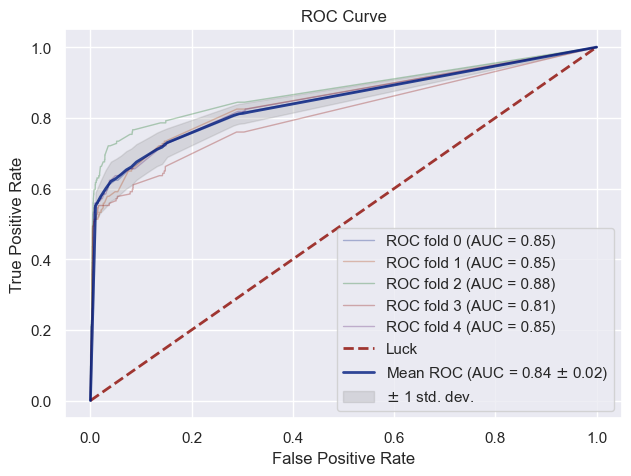

In [105]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

#📊 Modelo Final

Após validarmos nosso modelo, utilizaremos todos os dados de X e y, do dataset de treinamento, para o modelo final com os melhores hiperparâmetros encontrados na validação, definir o pipeline e treinar o modelo.

## Treinamento do modelo
Treinaremos o modelo com os melhores hiperparâmetros encontrados, executaremos o pipeline com o Oversampling e Random Forest ajustada e por fim, o modelo será treinado.

In [106]:
# separando novamente os dados
X_all = df_train.drop('pop_classe', axis=1)
y_all = df_train.pop_classe

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [107]:
model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(class_weight='balanced', max_features=6))

In [108]:
lista = model.steps[1][1].feature_importances_

In [109]:
print(lista.tolist())

[0.08625352384259326, 0.08756825635589494, 0.1152867840445227, 0.03408716621561005, 0.1263095956673519, 0.0060788558708638404, 0.08385252077066607, 0.10035880400949755, 0.10866038243196988, 0.0836359512106322, 0.08881815737375034, 0.07422424550172861, 0.004865756704918778]


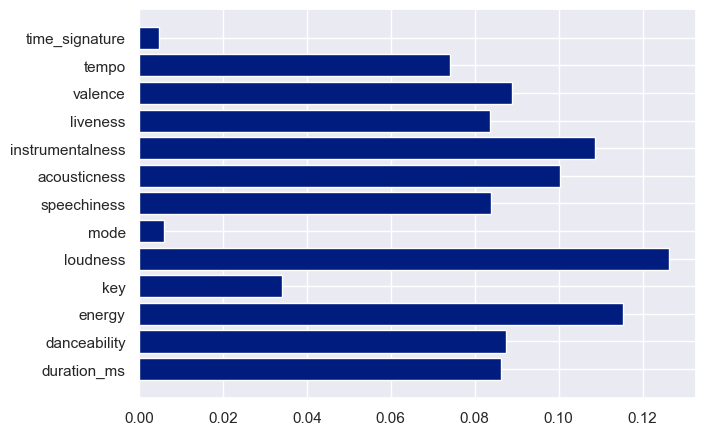

In [110]:
# lista de nomes
nomes = df_quantitative_nm.columns

plt.barh(df_quantitative_nm.drop(columns=['pop_classe']).columns.tolist(), lista.tolist())

plt.show()

Dia 7 - Modelo final

Após validarmos nosso modelo, utilizaremos todos os dados de X e y, do dataset de treinamento, para o modelo final com os melhores hiperparâmetros encontrados na validação, definir o pipeline e treinar o modelo.

## Treinando o modelo

Treinaremos o modelo com os melhores hiperparâmetros encontrados, executaremos o pipeline com o Oversampling e Random Forest ajustada e por fim, o modelo será treinado.



In [111]:
# separando novamente os dados
X_all = df_train.drop('pop_classe', axis=1)
y_all = df_train.pop_classe

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [112]:
model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(class_weight='balanced', max_features=6))

In [113]:
lista = model.steps[1][1].feature_importances_

In [114]:
print(lista.tolist())

[0.08901748553912028, 0.09046950597692514, 0.11605148461702991, 0.03410767244132173, 0.12304225021763047, 0.0063189961240894665, 0.0829454703090184, 0.09989035755177435, 0.10834953807556646, 0.08361923232960483, 0.08787168554133194, 0.07341050780290787, 0.004905813473679045]


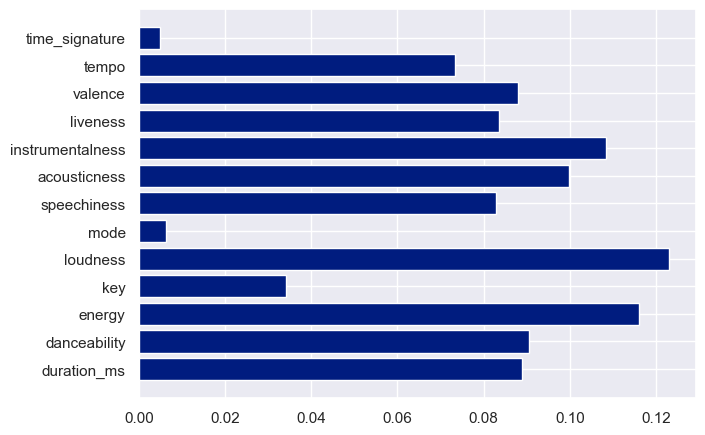

In [115]:
# lista de nomes
nomes = df_quantitative_nm.columns

plt.barh(df_quantitative_nm.drop(columns=['pop_classe']).columns.tolist(), lista.tolist())

plt.show()

`loudness` e `energy` possuem um alto coeficiente de importância no modelo. Porém, como vimos lá no começo, essas duas features possuem alta correlação. Talvez seja interessante voltar na etapa de pré-processamento de dados, para eliminar a alta correlação.

In [116]:
##SUGESTÃO DE REMOÇÃO DE CORRELAÇÃO NA ETAPA DE PRÉ-PROCESSAMENTO

'''
Função que analisa a correlação entre as variáveis do banco de dados, cria uma
máscara para remover os dados espelhados e retorna os dados sem as variáveis 
com correlação maior que o valor de corte 0.95.
'''

def remove_corr_var(dados, valor_corte = 0.95):

  matriz_corr = dados.iloc[:,4:-2].corr().abs()
  matriz_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
  excluir = [coluna for coluna in matriz_superior.columns if any(matriz_superior[coluna]> valor_corte)]
  
  return dados.drop(excluir, axis=1)

## Preparação, previsão e avaliação nos dados de teste

Aqui, utiliza-se o conjunto de dados de teste, que foi dividido no início, com 20% do total dos dados.

Além disso, os dados foram separados e simulou-se a entrada de dados novos para saber se o nosso modelo generaliza bem, o esperado é um resultado um pouco abaixo do que foi validado. Caso fique muito abaiixo do esperado, é necessário re-ajustar o modelo porque resultou em overfitting.

In [117]:
# separando os dados de teste
X_test = df_test.drop('pop_classe', axis=1)
y_test = df_test.pop_classe

# realizando as predições nos dados de teste
y_pred_test = model.predict(X_test)

# imprimindo os resultados
print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

accuracy:  0.9880228974020255
precision: 0.45179063360881544
recall:    0.6919831223628692
f1:        0.5466666666666666


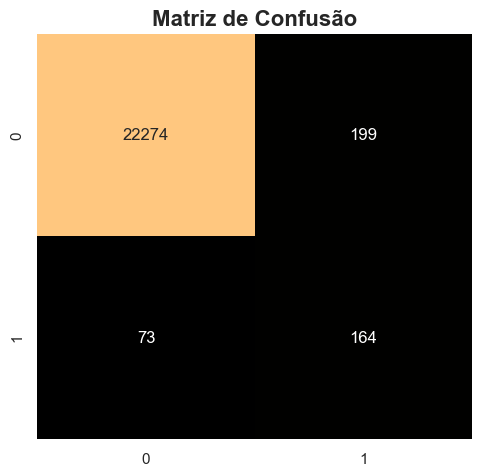

In [118]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()

In [119]:
pd.DataFrame(index=['Baseline', 'Validação', 'Teste'], 
             data = {"accuracy": [accuracy_score(y_val, y_pred_base_val), np.mean(accuracy_lst_rf), accuracy_score(y_test, y_pred_test)], 
                     "precision": [precision_score(y_val, y_pred_base_val), np.mean(precision_lst_rf), precision_score(y_test, y_pred_test)],
                     "recall": [recall_score(y_val, y_pred_base_val), np.mean(recall_lst_rf), recall_score(y_test, y_pred_test)],
                     "f1": [f1_score(y_val, y_pred_base_val), np.mean(f1_lst_rf), f1_score(y_test, y_pred_test)]}
            )

,accuracy,precision,recall,f1
Baseline,0.989431,0.000000,0.000000,0.000000
Validação,0.987739,0.436652,0.541558,0.483196
Teste,0.988023,0.451791,0.691983,0.546667


Salvando os resultados

In [121]:
# antes de executar, deve ser criada a pasta modelo_versao1
# salvando o modelo treinado no diretório atual
pkl_filename_model = "RandomForestModel.pkl"
with open(pkl_filename_model, 'wb') as file:
    pickle.dump(model, file)

In [122]:
# armazenando as previsões no dataframe de teste
df_test['Predicted'] = y_pred_test

# comparando com real com o previsto no dataframe
df_test['Correct?'] = np.where(df_test['pop_classe'] == df_test['Predicted'], 'Yes', 'No')

In [123]:
df_test.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe,Predicted,Correct?
77407,0.038236,0.433503,0.703,0.818182,0.786564,1.0,0.050466,0.577309,0.000000,0.9350,0.703518,0.346959,0.8,0.0,0.0,Yes
96769,0.018514,0.661929,0.701,0.181818,0.764904,1.0,0.036062,0.534137,0.000002,0.6020,0.932663,0.649721,0.8,0.0,0.0,Yes
6993,0.032000,0.581726,0.976,0.090909,0.842110,0.0,0.185492,0.000046,0.022200,0.2720,0.316583,0.468501,0.8,0.0,0.0,Yes
75387,0.052745,0.285279,0.141,0.363636,0.562418,0.0,0.034611,0.981928,0.883000,0.1030,0.207035,0.556169,0.6,0.0,0.0,Yes
61284,0.053683,0.409137,0.921,0.818182,0.865194,1.0,0.113990,0.032731,0.000000,0.0985,0.576884,0.730667,0.8,0.0,0.0,Yes


In [124]:
df_test[df_test['pop_classe'] == 1.0]

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe,Predicted,Correct?
68854,0.053064,0.825381,0.560,0.181818,0.806966,0.0,0.064041,0.108434,0.000000,0.2680,0.288442,0.484990,0.8,1.0,0.0,No
20367,0.031304,0.612183,0.691,0.454545,0.808797,1.0,0.038549,0.024900,0.000000,0.5830,0.579899,0.604622,0.8,1.0,0.0,No
57412,0.043998,0.522843,0.430,0.636364,0.732405,1.0,0.038549,0.009739,0.000133,0.1290,0.104523,0.377381,0.8,1.0,1.0,Yes
2105,0.061420,0.601015,0.767,0.818182,0.864602,0.0,0.027979,0.002108,0.001650,0.1270,0.329648,0.396442,0.8,1.0,1.0,Yes
51000,0.032284,0.873096,0.541,0.090909,0.795757,0.0,0.033679,0.165663,0.163000,0.0663,0.956784,0.472462,0.8,1.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30562,0.030111,0.745178,0.874,0.727273,0.857759,1.0,0.068601,0.168675,0.000011,0.0489,0.909548,0.505206,0.8,1.0,0.0,No
53075,0.027328,0.857868,0.797,0.090909,0.823983,1.0,0.144041,0.058434,0.000006,0.1670,0.424121,0.501229,0.8,1.0,1.0,Yes
91610,0.041293,0.559391,0.913,0.000000,0.841019,0.0,0.048290,0.026406,0.000013,0.3470,0.546734,0.493039,0.8,1.0,1.0,Yes
88407,0.044969,0.659898,0.715,0.454545,0.820025,0.0,0.262176,0.099699,0.000291,0.1260,0.187940,0.438308,0.8,1.0,1.0,Yes
